# Pre Requisite Examination

**Course:** ES 335 - Machine Learning  
**Exam:** Pre-Requisite Examination

- **Name:** Balgopal Moharana  
- **Roll No.:** 21110040  
- **Batch:** BTech '21 (Dual Majors)  


### Requirements installation

In [1]:
%pip install jax
%pip install numpy
%pip install matplotlib
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


###  Question - 1 : How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Multiplying two matrices **A** of size `(n × k)` and **B** of size `(k × m)`, the result is a matrix **C** of size `(n × m)`.

- Each entry in **C** comes from taking **one row from A** and **one column from B**, multiplying matching elements, and adding them up.
- For one entry:
  - **k multiplications**  are performed (one for each matching pair).
  - **k - 1 additions** are performed (to add the products together).

Since **C** has `n × m` entries:

- **Multiplications:** `n × m × k`
- **Additions:** `n × m × (k - 1)`



### Question - 2 : Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import numpy as np
import time
import random

In [3]:
def matrix_multiply_lists(A, B):
    n, k = len(A), len(A[0])
    m = len(B[0])
    result = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for kk in range(k):
                result[i][j] += A[i][kk] * B[kk][j]
    
    return result

def matrix_multiply_numpy(A, B):
    return np.matmul(A, B)

In [4]:
n, k, m = 100, 80, 120

A_numpy = np.random.randint(1, 10, size=(n, k))
B_numpy = np.random.randint(1, 10, size=(k, m))

A_list = A_numpy.tolist()
B_list = B_numpy.tolist()

start_time = time.time()
result_list = matrix_multiply_lists(A_list, B_list)
list_time = time.time() - start_time

start_time = time.time()
result_numpy = matrix_multiply_numpy(A_numpy, B_numpy)
numpy_time = time.time() - start_time

print(f"Matrix dimensions: ({n}×{k}) × ({k}×{m})")
print(f"List of lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {list_time/numpy_time:.1f}x faster")

Matrix dimensions: (100×80) × (80×120)
List of lists time: 0.189574 seconds
NumPy time: 0.010511 seconds
NumPy is 18.0x faster


NumPy is significantly faster than native Python functions because it uses optimized C libraries (like BLAS and LAPACK) for computations and performs vectorized operations that eliminate the need for Python interpreter loops.

### Question - 3 : Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

If finding the *k-th* largest element takes **k passes**, then finding the median means doing about `n/2` passes for an array of size `n`.

- Each pass takes `O(n)` time (to find and remove the largest element).
- Doing this `n/2` times gives **O(n²)** overall.

Instead of repeatedly finding the maximum and removing it, we can **sort the array once** and directly pick the median:

- Sorting: `O(n log n)`
- Median lookup: `O(1)`

**Median lookup**
- if n is odd then median : `array[n//2]`
- if n is even then median : `(array[n//2 -1] + array[n//2])/2`

That’s a huge speed boost from `O(n²)` to `O(n log n)`.

Even faster methods exist, like:
- **QuickSelect** → Average `O(n)`
- **Median of Medians** → Worst-case `O(n)`

In [5]:
import time
import random
import numpy as np

In [6]:
def naive_median(arr):
    n = len(arr)
    if n == 0:
        return None
    arr_copy = arr.copy()
    for _ in range(n // 2):
        max_val = max(arr_copy)
        arr_copy.remove(max_val)
    if n % 2 == 1:
        return max(arr_copy)
    else:
        max1 = max(arr_copy)
        arr_copy.remove(max1)
        max2 = max(arr_copy) if arr_copy else max1
        return (max1 + max2) / 2

def better_median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n == 0:
        return None
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

In [7]:
size = int(1e5)
arr = [random.randint(1, 10) for _ in range(size)]

start = time.time()
med_naive = naive_median(arr)
naive_time = time.time() - start

start = time.time()
med_better = better_median(arr)
better_time = time.time() - start

start = time.time()
med_numpy = np.median(arr)
numpy_time = time.time() - start

print(f"Array size: {size}")
print(f"Naive method (O(n²)): {naive_time:.6f} seconds")
print(f"Better method (O(n log n)): {better_time:.6f} seconds")
print(f"NumPy median: {numpy_time:.6f} seconds")
print(f"Better method is {naive_time/better_time:.1f}x faster than naive")
print(f"NumPy is {better_time/numpy_time:.1f}x faster than better method")

Array size: 100000
Naive method (O(n²)): 131.954906 seconds
Better method (O(n log n)): 0.016773 seconds
NumPy median: 0.026846 seconds
Better method is 7866.9x faster than naive
NumPy is 0.6x faster than better method


### Question - 4 What is the gradient of the following function with respect to x and y?
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$

**Partial derivatives**

**With respect to \(x\):**
$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

**With respect to \(y\):**
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

**Gradient**
$$
\nabla f(x, y) =
\left[
\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y}
\right]
=
\left[
2xy + y^3 \cos(x),\ x^2 + 3y^2 \sin(x)
\right]
$$

### Question - 5 Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
import jax.numpy as jnp
from jax import grad
import numpy as np

In [9]:

def f(vars):
    x, y = vars
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

In [10]:
f_grad = grad(f)

np.random.seed(42)
for _ in range(5):
    x_val = np.random.uniform(-5, 5)
    y_val = np.random.uniform(-5, 5)
    auto_grad = f_grad(jnp.array([x_val, y_val]))
    manual_grad = analytical_grad(x_val, y_val)
    print(f"x={x_val:.3f}, y={y_val:.3f}")
    print(f"Analytical: {manual_grad}")
    print(f"JAX auto : {auto_grad}")
    print(f"Match?    {jnp.allclose(manual_grad, auto_grad)}\n")

x=-1.255, y=4.507
Analytical: [ 17.161594 -56.347733]
JAX auto : [ 17.161594 -56.347733]
Match?    True

x=2.320, y=0.987
Analytical: [3.9236646 7.520391 ]
JAX auto : [3.923664 7.520391]
Match?    True

x=-3.440, y=-3.440
Analytical: [62.578934 22.2635  ]
JAX auto : [62.57894  22.263502]
Match?    True

x=-4.419, y=3.662
Analytical: [-46.55541   58.037537]
JAX auto : [-46.555405  58.03754 ]
Match?    True

x=1.011, y=2.081
Analytical: [ 8.990255 12.029234]
JAX auto : [ 8.990253 12.029232]
Match?    True



### Question - 6 Use `sympy` to confirm that you obtain the same gradient analytically.

In [11]:
import sympy as sp

In [12]:
x, y = sp.symbols('x y', real=True)

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Symbolic gradient from SymPy:")
print(f"∂f/∂x = {df_dx}")
print(f"∂f/∂y = {df_dy}")

manual_df_dx = 2*x*y + y**3 * sp.cos(x)
manual_df_dy = x**2 + 3*y**2 * sp.sin(x)

print("\nManual gradient:")
print(f"∂f/∂x = {manual_df_dx}")
print(f"∂f/∂y = {manual_df_dy}")

print(df_dx == manual_df_dx)
print(df_dy == manual_df_dy)

Symbolic gradient from SymPy:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

Manual gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)
True
True


### Question - 7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [13]:
students_data = {
    2022: {
        "Branch 1": {
            2210040: {  # Roll Number
                "Name": "Alice",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            },
            2210041: {
                "Name": "Bob",
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                    "Science": 88
                }
            }
        },
        "Branch 2": {
            2210042: {
                "Name": "Charlie",
                "Marks": {
                    "Maths": 95,
                    "English": 78,
                    "Science": 82
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            2310053: {
                "Name": "David",
                "Marks": {
                    "Maths": 87,
                    "English": 92,
                    "Science": 76
                }
            }
        },
        "Branch 2": {
            2310047: {
                "Name": "Eva",
                "Marks": {
                    "Maths": 91,
                    "English": 88,
                    "Science": 90
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            2410059: {
                "Name": "Frank",
                "Marks": {
                    "Maths": 84,
                    "English": 77,
                    "Science": 80
                }
            }
        },
        "Branch 2": {
            2410044: {
                "Name": "Grace",
                "Marks": {
                    "Maths": 93,
                    "English": 85,
                    "Science": 89
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            2510051: {
                "Name": "Henry",
                "Marks": {
                    "Maths": 88,
                    "English": 81,
                    "Science": 79
                }
            }
        },
        "Branch 2": {
            2510046: {
                "Name": "Isla",
                "Marks": {
                    "Maths": 90,
                    "English": 87,
                    "Science": 85
                }
            }
        }
    }
}


### Question - 8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [14]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(roll={self.roll_number}, name={self.name}, marks={self.marks})"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.name}, students={len(self.students)})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, branches={len(self.branches)})"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year_obj):
        self.years.append(year_obj)

    def __repr__(self):
        return f"Database(years={len(self.years)})"




In [15]:
db = Database()

for year, branches_data in students_data.items():
    year_obj = Year(year)
    for branch_name, students in branches_data.items():
        branch_obj = Branch(branch_name)
        for roll_no, details in students.items():
            student_obj = Student(
                roll_number=roll_no,
                name=details["Name"],
                marks=details["Marks"]
            )
            branch_obj.add_student(student_obj)
        year_obj.add_branch(branch_obj)
    db.add_year(year_obj)


for year in db.years:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"    {student}")


Year: 2022
  Branch: Branch 1
    Student(roll=2210040, name=Alice, marks={'Maths': 100, 'English': 70, 'Science': 85})
    Student(roll=2210041, name=Bob, marks={'Maths': 90, 'English': 80, 'Science': 88})
  Branch: Branch 2
    Student(roll=2210042, name=Charlie, marks={'Maths': 95, 'English': 78, 'Science': 82})
Year: 2023
  Branch: Branch 1
    Student(roll=2310053, name=David, marks={'Maths': 87, 'English': 92, 'Science': 76})
  Branch: Branch 2
    Student(roll=2310047, name=Eva, marks={'Maths': 91, 'English': 88, 'Science': 90})
Year: 2024
  Branch: Branch 1
    Student(roll=2410059, name=Frank, marks={'Maths': 84, 'English': 77, 'Science': 80})
  Branch: Branch 2
    Student(roll=2410044, name=Grace, marks={'Maths': 93, 'English': 85, 'Science': 89})
Year: 2025
  Branch: Branch 1
    Student(roll=2510051, name=Henry, marks={'Maths': 88, 'English': 81, 'Science': 79})
  Branch: Branch 2
    Student(roll=2510046, name=Isla, marks={'Maths': 90, 'English': 87, 'Science': 85})


### Question - 9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$  

2. $y = x^2$  

3. $y = \frac{x^3}{100}$  

4. $y = \sin(x)$  

5. $y = \frac{\sin(x)}{x}$  

6. $y = \log(x)$  

7. $y = e^x$  



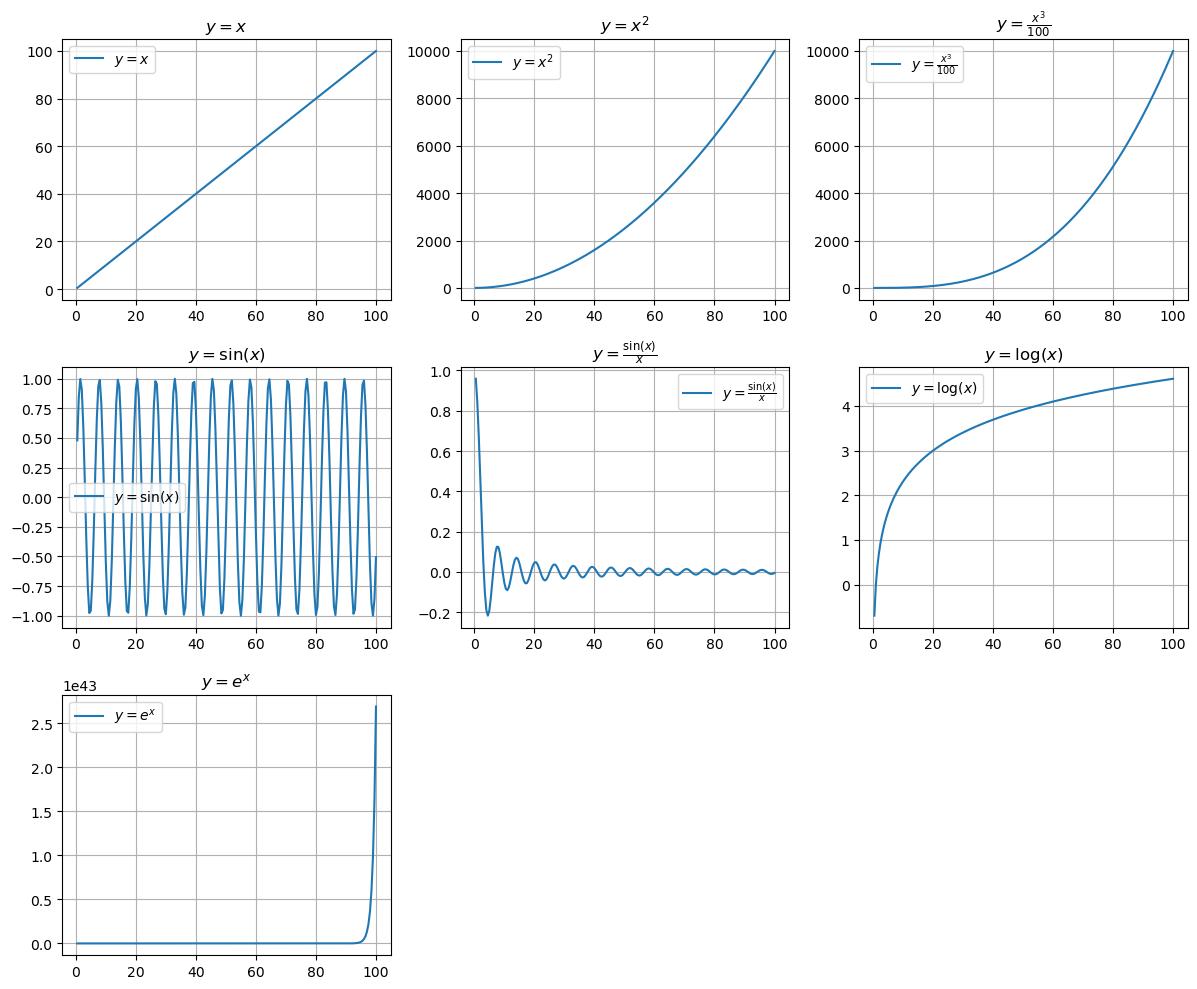

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)  

# Create figure with subplots
plt.figure(figsize=(12, 10))

# List of y values and titles
y_values = [y1, y2, y3, y4, y5, y6, y7]
titles = [
    r"$y = x$",
    r"$y = x^2$",
    r"$y = \frac{x^3}{100}$",
    r"$y = \sin(x)$",
    r"$y = \frac{\sin(x)}{x}$",
    r"$y = \log(x)$",
    r"$y = e^x$ "
]

# Plot each function in a grid
for i, (y, title) in enumerate(zip(y_values, titles), start=1):
    plt.subplot(3, 3, i)  # 3x3 grid, leaving some empty spots
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


### Question 10 : Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [17]:
import numpy as np
import pandas as pd

# Generate 20x5 matrix with random numbers uniformly from 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Create DataFrame
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Find column with highest standard deviation
col_highest_std = df.std().idxmax()

# Find row with lowest mean
row_lowest_mean = df.mean(axis=1).idxmin()

# Output results
print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", col_highest_std)
print("Row with lowest mean (index):", row_lowest_mean)
print("Row values:\n", df.loc[row_lowest_mean])


DataFrame:
            a         b         c         d         e
0   1.020584  1.969910  1.832443  1.212339  1.181825
1   1.183405  1.304242  1.524756  1.431945  1.291229
2   1.611853  1.139494  1.292145  1.366362  1.456070
3   1.785176  1.199674  1.514234  1.592415  1.046450
4   1.607545  1.170524  1.065052  1.948886  1.965632
5   1.808397  1.304614  1.097672  1.684233  1.440152
6   1.122038  1.495177  1.034389  1.909320  1.258780
7   1.662522  1.311711  1.520068  1.546710  1.184854
8   1.969585  1.775133  1.939499  1.894827  1.597900
9   1.921874  1.088493  1.195983  1.045227  1.325330
10  1.388677  1.271349  1.828738  1.356753  1.280935
11  1.542696  1.140924  1.802197  1.074551  1.986887
12  1.772245  1.198716  1.005522  1.815461  1.706857
13  1.729007  1.771270  1.074045  1.358466  1.115869
14  1.863103  1.623298  1.330898  1.063558  1.310982
15  1.325183  1.729606  1.637557  1.887213  1.472215
16  1.119594  1.713245  1.760785  1.561277  1.770967
17  1.493796  1.522733  1.427541  

### Question 11 : Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [18]:
# Add column 'f' as the sum of a, b, c, d, e
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Add column 'g' based on condition on 'f'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Number of rows where g is 'LT8'
count_LT8 = (df['g'] == 'LT8').sum()

# Standard deviation of 'f' for LT8 and GT8 groups
std_f_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_f_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Output results
print("Number of rows where g = 'LT8':", count_LT8)
print("Std dev of 'f' where g = 'LT8':", std_f_LT8)
print("Std dev of 'f' where g = 'GT8':", std_f_GT8)


Number of rows where g = 'LT8': 18
Std dev of 'f' where g = 'LT8': 0.3889255787803507
Std dev of 'f' where g = 'GT8': 0.7956146881961926


### Question 12 : Write a small piece of code to explain broadcasting in numpy.

In [19]:
import numpy as np

# A 3x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# A 1D array of length 3
b = np.array([10, 20, 30])

# Broadcasting: b is added to each row of A
C = A + b

print("Matrix A:\n", A)
print("\nArray b:", b)
print("\nResult (A + b):\n", C)


Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b: [10 20 30]

Result (A + b):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


Explanation : NumPy broadcasts b to match (3, 3) by repeating it across rows automatically.

### Question - 13 : Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [20]:
import numpy as np

def my_argmin(arr):
    # Start by assuming the first element is the minimum
    min_index = 0
    min_value = arr[0]
    
    # Loop through the array to find the min index
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

# Example usage
arr = np.array([5, 2, 8, 1, 4])

custom_result = my_argmin(arr)
numpy_result = np.argmin(arr)  # For verification

print("Array:", arr)
print("Custom argmin index:", custom_result)
print("NumPy argmin index:", numpy_result)
print(custom_result == numpy_result)


Array: [5 2 8 1 4]
Custom argmin index: 3
NumPy argmin index: 3
True
